In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def generate_sparse_tensor(shape=(8, 8), fill_ratio=0.1, fill_value=1):
    total_elements = shape[0] * shape[1]
    num_fill = int(total_elements * fill_ratio)

    tensor = torch.zeros(total_elements, dtype=torch.int)
    indices = torch.randperm(total_elements)[:num_fill]
    tensor[indices] = fill_value

    return tensor.view(shape)

In [10]:
def generate_param_plot(seed, mask=None):
    torch.manual_seed(seed)

    params = generate_sparse_tensor()
    if mask is not None:
        params *= mask.repeat(4, 4)

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    color = torch.tensor([[0.19, 0.39],
                          [0.59, 0.79]]).repeat(4, 4)
    ax.imshow(color, cmap="tab20b", vmin=0.0, vmax=1.0)

    line_width = 1.0
    for x in range(0, 8):
        ax.axvline(x=x - 0.5, color="white", linewidth=line_width)
    for y in range(0, 8):
        ax.axhline(y=y - 0.5, color="white", linewidth=line_width)

    for i in range(8):
        for j in range(8):
            text_color = "black"
            if params[i, j] > 0:
                ax.text(j, i, f"{params[i, j]:.2f}", ha="center", va="center", 
                        color=text_color, fontsize=12, fontweight="bold")
            else:
                ax.text(j, i, "0", ha="center", va="center", 
                        color=text_color, fontsize=12, fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])
    fig.tight_layout()
    plt.show()

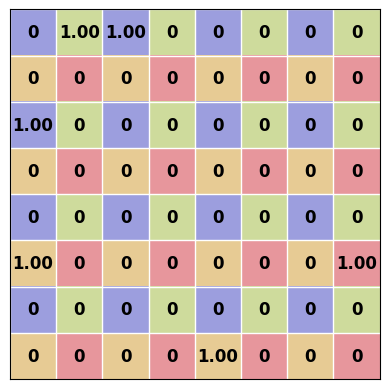

In [11]:
generate_param_plot(1234)

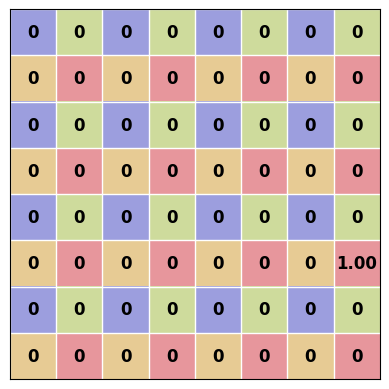

In [12]:
generate_param_plot(1234, mask=torch.tensor([[0, 0],
                                             [0, 1]], dtype=torch.int))